In [1]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Data Preprocessing

In [2]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
iris_dict = {
    "SepalLengthCm":iris["data"][:,0],
    "SepalWidthCm":iris["data"][:,1],
    "PetalLengthCm":iris["data"][:,2],
    "PetalWidthCm":iris["data"][:,3],
    "Species":iris["target"]
}
iris_df = pd.DataFrame(iris_dict)
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.3 KB


In [6]:
print("Row:",len(iris_df.index), "Col:",len(iris_df.columns))

Row: 150 Col: 5


In [7]:
nulldata = [iris_df.columns[c] for c,i in enumerate(iris_df.isnull().any()) if i==True]
if not nulldata:
    print("no null data")

no null data


In [8]:
iris_df_labels = pd.cut(iris_df["Species"], bins=3, labels=iris["target_names"])
iris_df["Labels"] = iris_df_labels

In [10]:
iris_df.tail(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Labels
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


# 2. Feature Select

In [11]:
feature = ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]
train_X = iris_df[feature]
train_Y = iris_df["Labels"]

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_Y = le.fit_transform(train_Y)

In [13]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y= train_test_split(train_X, train_Y, test_size = 0.2, random_state = 42)

# 3.Data Visualization

<Figure size 864x864 with 0 Axes>

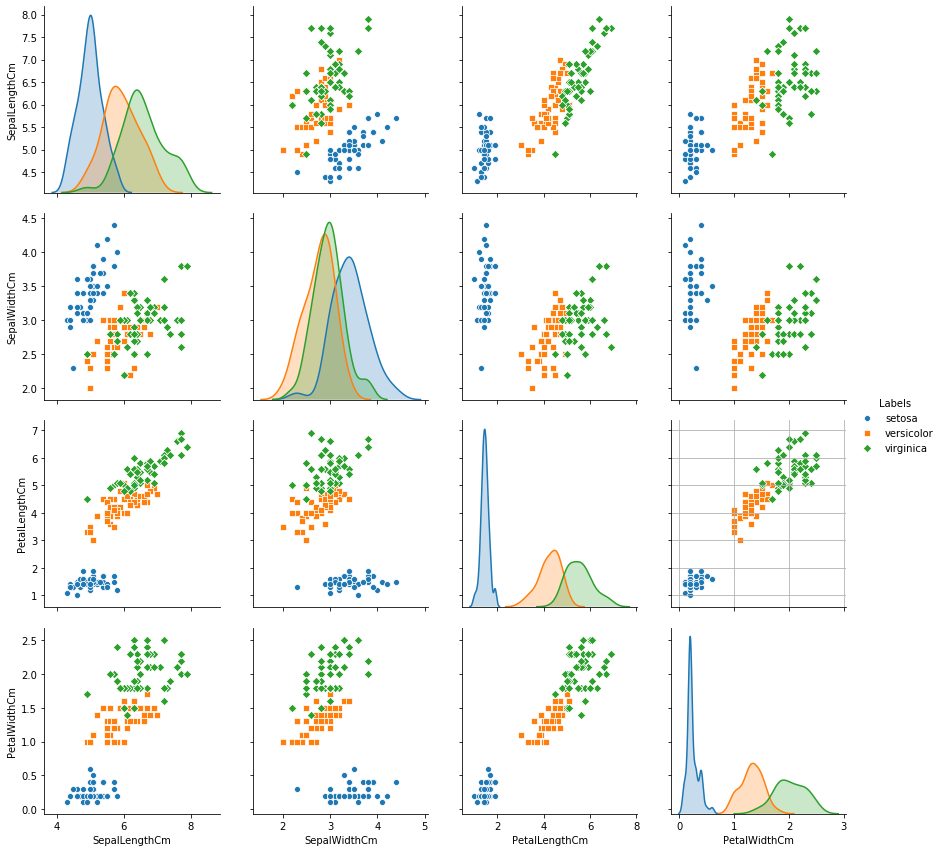

In [16]:
plt.figure(figsize=(12,12))
sns.pairplot(data = iris_df.drop("Species", axis=1), hue = "Labels", size=3, markers=["o", "s", "D"])
plt.grid(True)
plt.show()

# 4.Bayesian Classifier

## Gaussin Bayesia Classifier
#### 主要用於連續變量: 長度 & 重量...等

In [27]:
model_Ga = GaussianNB()
model_Ga = model_Ga.fit(train_x,train_y)
model_Ga

GaussianNB(priors=None, var_smoothing=1e-09)

In [39]:
predict_Ga = model_Ga.predict(test_x)
predict_Ga

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [40]:
model_Ga.predict_proba(test_x)

array([[5.97327448e-090, 9.95635767e-001, 4.36423302e-003],
       [1.00000000e+000, 4.96158126e-014, 6.54922363e-021],
       [7.31890302e-290, 4.92947614e-012, 1.00000000e+000],
       [2.81842533e-094, 9.77593559e-001, 2.24064412e-002],
       [1.13877801e-105, 8.70022596e-001, 1.29977404e-001],
       [1.00000000e+000, 1.73180181e-013, 3.66170159e-021],
       [5.90437185e-053, 9.99955645e-001, 4.43550046e-005],
       [5.98735064e-177, 1.18219872e-006, 9.99998818e-001],
       [4.01752535e-096, 9.92158276e-001, 7.84172366e-003],
       [3.15071776e-059, 9.99938983e-001, 6.10171853e-005],
       [4.44911663e-152, 5.88867020e-004, 9.99411133e-001],
       [1.00000000e+000, 2.04863718e-017, 4.73585098e-025],
       [1.00000000e+000, 4.22431128e-017, 1.86022566e-024],
       [1.00000000e+000, 5.31248651e-017, 1.85939976e-024],
       [1.00000000e+000, 8.92960033e-017, 4.55408899e-024],
       [1.04918592e-107, 6.02930476e-001, 3.97069524e-001],
       [6.78610052e-204, 5.05656256e-007

In [37]:
from sklearn import metrics
score_Ga = metrics.accuracy_score(test_y, predict_Ga)

In [41]:
print("Train set score:", model_Ga.score(train_x, train_y))
print("Test set score:", model_Ga.score(test_x, test_y))

Train set score: 0.95
Test set score: 1.0


## Multinomial Bayesian
#### 主要用於離散變數 例如:次方 種類別

In [42]:
model_Mu = MultinomialNB()
model_Mu = model_Mu.fit(train_x, train_y)
model_Mu

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [43]:
predict_Mu = model_Mu.predict(test_x)
predict_Mu

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1,
       0, 2, 1, 2, 2, 2, 0, 0])

In [47]:
model_Mu.predict_proba(test_x)

array([[0.04780234, 0.51133139, 0.44086628],
       [0.73650534, 0.17558264, 0.08791202],
       [0.00248323, 0.4509208 , 0.54659596],
       [0.0387217 , 0.50438963, 0.45688867],
       [0.03914515, 0.51591318, 0.44494167],
       [0.67876451, 0.20879659, 0.11243889],
       [0.08862298, 0.499148  , 0.41222901],
       [0.0113087 , 0.48294328, 0.50574802],
       [0.02668138, 0.4960599 , 0.47725872],
       [0.07568172, 0.50425873, 0.42005955],
       [0.01667883, 0.49240407, 0.4909171 ],
       [0.70552841, 0.19058948, 0.10388211],
       [0.77680598, 0.14919291, 0.07400112],
       [0.70626032, 0.19078999, 0.1029497 ],
       [0.74307451, 0.1695004 , 0.08742509],
       [0.03923051, 0.5104538 , 0.45031568],
       [0.00659507, 0.46566181, 0.52774311],
       [0.07399525, 0.50193529, 0.42406945],
       [0.04485979, 0.50405056, 0.45108965],
       [0.00666256, 0.46258313, 0.53075431],
       [0.66531281, 0.21458577, 0.12010142],
       [0.0208107 , 0.49293484, 0.48625445],
       [0.

In [45]:
score_Mu = metrics.accuracy_score(test_y, predict_Mu)
score_Mu

0.9

In [46]:
print("Train set score:", model_Mu.score(train_x, train_y))
print("Test set score:", model_Mu.score(test_x, test_y))

Train set score: 0.95
Test set score: 0.9
